In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2012','8th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Charter/Contract Schools,8th Grade,2012,40.0,-1.2,-2.4 to 0,9,Yellow,40.0,-0.1,-0.9 to 0.7,49,Yellow,"LOCKE, A CHTR",400011,4730,Charter,8th Grade,2012,87.5,85.0,86.3,5.0,35.0,20,82.5,50.0,66.3,12.5,15.0,13.8,0,0.0,0.0,40,40
1,AMANDLA CHTR HS,400012,Charter/Contract Schools,8th Grade,2012,87.2,-0.4,-1.4 to 0.6,37,Yellow,87.2,-1.2,-1.8 to -0.6,8,Red,AMANDLA CHTR HS,400012,2035,Charter,8th Grade,2012,88.2,87.1,87.6,0.0,20.0,10,88.2,67.1,77.6,11.8,12.9,12.4,0,0.0,0.0,85,85
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,8th Grade,2012,183.4,-0.6,-1.4 to 0.2,27,Yellow,183.4,-1.0,-1.4 to -0.6,13,Red,ASPIRA CHTR - HAUGAN,400017,3500,Charter,8th Grade,2012,72.0,69.4,70.7,0.9,15.1,8,71.1,54.3,62.7,28.0,29.7,28.8,0,0.9,0.5,218,219


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(428, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     9.700
Date:                Mon, 03 Aug 2015   Prob (F-statistic):            0.00197
Time:                        16:51:38   Log-Likelihood:                -1600.2
No. Observations:                 428   AIC:                             3204.
Df Residuals:                     426   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     83.2963      0.493    168.858      0.000        82.327    84.266
x              1.4983      0.481      3.114      0.002         0.553     2.444
==============================================================================
Omnibus:                       15.890   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.901
Skew:                          -0.372   Prob(JB):                     0.000958
Kurtosis:                       2.526   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

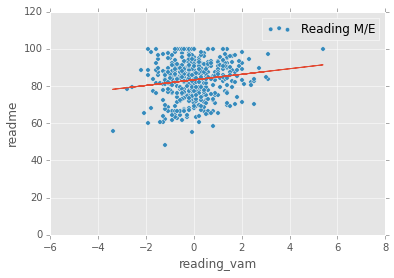

In [4]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E")
plt.ylim(0, 120)
plt.xlim(-6, 8)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.242
Date:                Mon, 03 Aug 2015   Prob (F-statistic):            0.00740
Time:                        11:27:18   Log-Likelihood:                -1552.9
No. Observations:                 428   AIC:                             3110.
Df Residuals:                     426   BIC:                             3118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.4803      0.442     14.672      0.000         5.612     7.349
x              1.1592      0.431      2.691      0.007         0.313     2.006
==============================================================================
Omnibus:                      296.614   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2956.548
Skew:                           2.976   Prob(JB):                         0.00
Kurtosis:                      14.417   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

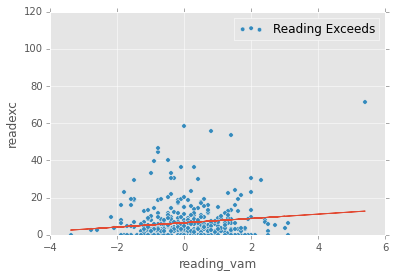

In [7]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5605
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.454
Time:                        11:27:46   Log-Likelihood:                -1577.0
No. Observations:                 428   AIC:                             3158.
Df Residuals:                     426   BIC:                             3166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     76.8143      0.467    164.385      0.000        75.896    77.733
x              0.3412      0.456      0.749      0.454        -0.555     1.237
==============================================================================
Omnibus:                       45.090   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.235
Skew:                          -0.614   Prob(JB):                     1.14e-19
Kurtosis:                       4.840   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

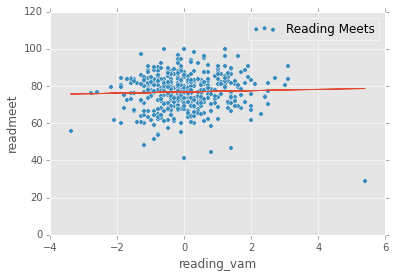

In [8]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.244
Date:                Mon, 03 Aug 2015   Prob (F-statistic):            0.00251
Time:                        11:28:14   Log-Likelihood:                -1594.7
No. Observations:                 428   AIC:                             3193.
Df Residuals:                     426   BIC:                             3201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.5292      0.487     33.947      0.000        15.572    17.486
x             -1.4438      0.475     -3.040      0.003        -2.377    -0.510
==============================================================================
Omnibus:                       16.189   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.107
Skew:                           0.375   Prob(JB):                     0.000864
Kurtosis:                       2.521   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

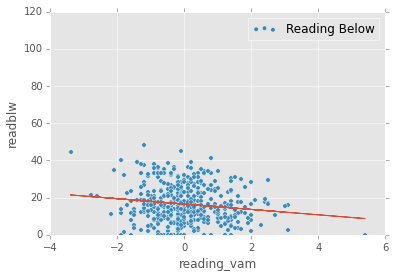

In [9]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.496
Date:                Mon, 03 Aug 2015   Prob (F-statistic):             0.0622
Time:                        11:28:39   Log-Likelihood:                -408.80
No. Observations:                 428   AIC:                             821.6
Df Residuals:                     426   BIC:                             829.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1771      0.030      5.807      0.000         0.117     0.237
x             -0.0556      0.030     -1.870      0.062        -0.114     0.003
==============================================================================
Omnibus:                      357.225   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4459.971
Skew:                           3.787   Prob(JB):                         0.00
Kurtosis:                      16.882   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

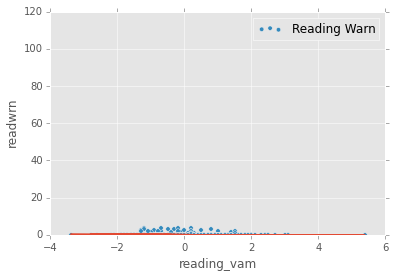

In [10]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.45
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000276
Time:                        11:29:17   Log-Likelihood:                -1684.9
No. Observations:                 428   AIC:                             3374.
Df Residuals:                     426   BIC:                             3382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     80.4416      0.601    133.875      0.000        79.261    81.623
x              2.0727      0.565      3.667      0.000         0.962     3.184
==============================================================================
Omnibus:                       50.102   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.825
Skew:                          -0.864   Prob(JB):                     5.09e-15
Kurtosis:                       3.840   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

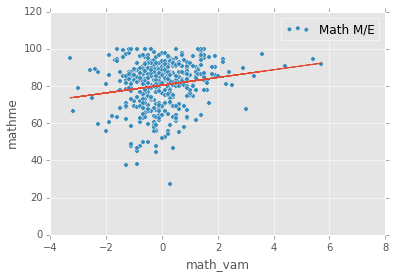

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           8.48e-07
Time:                        11:29:48   Log-Likelihood:                -1823.5
No. Observations:                 428   AIC:                             3651.
Df Residuals:                     426   BIC:                             3659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.8143      0.831     28.668      0.000        22.182    25.447
x              3.9054      0.781      4.998      0.000         2.369     5.441
==============================================================================
Omnibus:                      121.474   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.508
Skew:                           1.451   Prob(JB):                     3.33e-61
Kurtosis:                       5.682   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

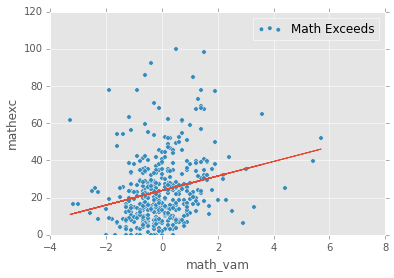

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.385
Date:                Mon, 03 Aug 2015   Prob (F-statistic):            0.00233
Time:                        11:30:15   Log-Likelihood:                -1709.0
No. Observations:                 428   AIC:                             3422.
Df Residuals:                     426   BIC:                             3430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.6292      0.636     89.086      0.000        55.380    57.879
x             -1.8318      0.598     -3.063      0.002        -3.007    -0.657
==============================================================================
Omnibus:                       61.383   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.044
Skew:                          -0.810   Prob(JB):                     2.33e-26
Kurtosis:                       4.998   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

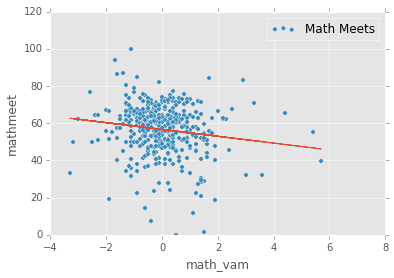

In [13]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     14.05
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000202
Time:                        11:30:38   Log-Likelihood:                -1672.9
No. Observations:                 428   AIC:                             3350.
Df Residuals:                     426   BIC:                             3358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.1909      0.584     32.842      0.000        18.042    20.339
x             -2.0606      0.550     -3.749      0.000        -3.141    -0.980
==============================================================================
Omnibus:                       48.738   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.761
Skew:                           0.845   Prob(JB):                     1.43e-14
Kurtosis:                       3.849   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

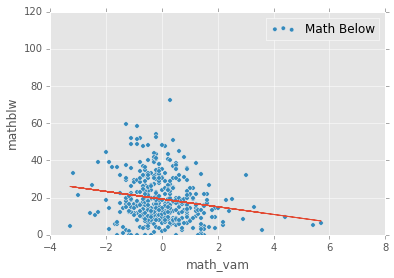

In [14]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05424
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.816
Time:                        11:30:56   Log-Likelihood:                -601.78
No. Observations:                 428   AIC:                             1208.
Df Residuals:                     426   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3692      0.048      7.718      0.000         0.275     0.463
x             -0.0105      0.045     -0.233      0.816        -0.099     0.078
==============================================================================
Omnibus:                      351.979   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5525.956
Skew:                           3.575   Prob(JB):                         0.00
Kurtosis:                      19.086   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

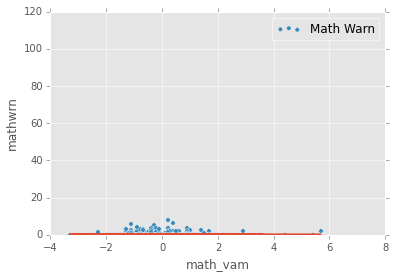

In [15]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()